## Data Analysis and Preparation of Amazon Fine Food reviews


This notebook will discuss the overall structure of the amazon fine food reviews taken from this kaggle page: https://www.kaggle.com/snap/amazon-fine-food-reviews/data <br>


The metadata of the column is as below:<br>
Id<br>
ProductId - unique identifier for the product<br>
UserId - unqiue identifier for the user<br>
ProfileName<br>
HelpfulnessNumerator - number of users who found the review helpful<br>
HelpfulnessDenominator - number of users who indicated whether they found the review helpful<br>
Score - rating between 1 and 5<br>
Time - timestamp for the review<br>
Summary - brief summary of the review<br>
Text - text of the review<br>

The notebook will also attempt to do some feature engineering and observe if the engineered features are of interest for use in creating the predictive model. 

In [28]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')


input_location = '/Users/momori/data/reviews.csv'
output_location = '/Users/momori/data/reviews_processed.csv'

First off we will load the data into a pandas dataframe then analyze the data. Couple of things we want to check here are the below: <br>
- distribution of the HelpfulnessNumerator/HelpfulnessDenominator/Score
- create a new column for HelpfulnessRatio, which is HelpfulnessNumerator/HelpfulnessDenominator for each Id
- Create a new feature named 'normalized_score' which will be explained below.

In [2]:
data = pd.read_csv(input_location)
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [3]:
pd.set_option('display.max_colwidth', -1)
data[['Score','Text']]

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."
5,4,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat."
6,5,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, Fralinger's. Would highly recommend this candy! I served it at a beach-themed party and everyone loved it!"
7,5,This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!
8,5,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too
9,5,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.


In [4]:
#create the HelpfulnessRatio column 
data['HelpfulnessRatio'] = data['HelpfulnessNumerator']/data['HelpfulnessDenominator']
data['HelpfulnessRatio'].describe()

count    298402.000000
mean     0.776975     
std      0.346321     
min      0.000000     
25%      0.600000     
50%      1.000000     
75%      1.000000     
max      3.000000     
Name: HelpfulnessRatio, dtype: float64

Now that we have the data and the HelpfulnessRatio, we will plot the data to check the distribution.  This will help in determining any possible outliers which wouldn't help on creating a predictive model and to clean the data

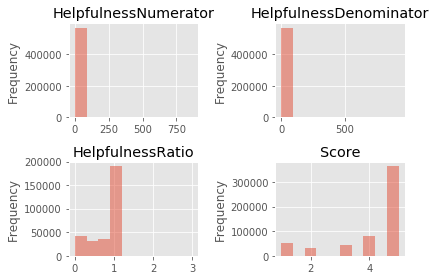

In [5]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
data['HelpfulnessNumerator'].plot.hist(alpha=0.5)
ax1.set_title('HelpfulnessNumerator')

ax2 = fig.add_subplot(2,2,2)
data['HelpfulnessDenominator'].plot.hist(alpha=0.5)
ax2.set_title('HelpfulnessDenominator')

ax3 = fig.add_subplot(2,2,3)
data['HelpfulnessRatio'].plot.hist(alpha=0.5)
ax3.set_title('HelpfulnessRatio')

ax4 = fig.add_subplot(2,2,4)
data['Score'].plot.hist(alpha=0.5)
ax4.set_title('Score')


plt.tight_layout()

plt.show()

As seen above, the histograms for Helpfulness columns are not informative due to some outliers.  Instead of a histogram, we will utilize a boxplot to better see the distribution and the different quantiles

Helpfulness Numerator quantiles
0.700    1.0 
0.800    2.0 
0.900    4.0 
0.950    7.0 
0.990    19.0
0.995    30.0
Name: HelpfulnessNumerator, dtype: float64


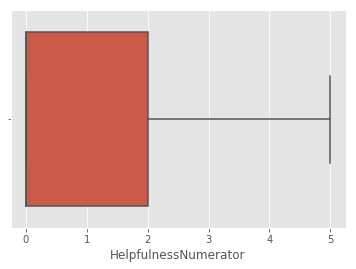

In [6]:
print 'Helpfulness Numerator quantiles'
print data['HelpfulnessNumerator'].quantile([0.7,0.8,0.9, 0.95, 0.99, 0.995])

ax = sns.boxplot(x=data['HelpfulnessNumerator'], showfliers=False)
plt.show()

Helpfulness Denominator quantiles
0.700    2.0 
0.800    3.0 
0.900    5.0 
0.950    9.0 
0.990    23.0
0.995    35.0
Name: HelpfulnessDenominator, dtype: float64


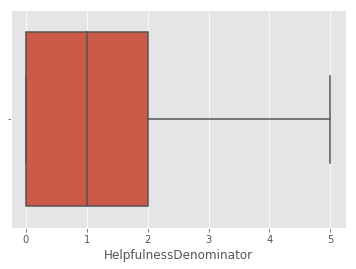

In [7]:
print 'Helpfulness Denominator quantiles'
print data['HelpfulnessDenominator'].quantile([0.7,0.8,0.9, 0.95, 0.99, 0.995])

ax = sns.boxplot(x=data['HelpfulnessDenominator'], showfliers=False)
plt.show()

Helpfulness Ratio quantiles
0.700    1.0
0.800    1.0
0.900    1.0
0.950    1.0
0.990    1.0
0.995    1.0
Name: HelpfulnessRatio, dtype: float64


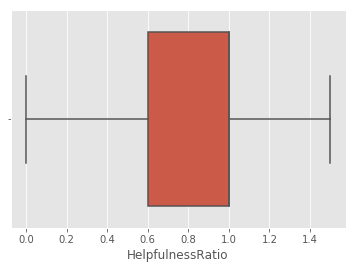

In [8]:
print 'Helpfulness Ratio quantiles'
print data['HelpfulnessRatio'].quantile([0.7,0.8,0.9, 0.95, 0.99, 0.995])

ax = sns.boxplot(x=data['HelpfulnessRatio'], showfliers=False)
plt.show()

We notice from the above boxplots that most values of helpfulness numerator/denominator is covered by values less than 5.  We can probably just utilize these data and discard the rest. But the other thing to notice from the boxplots is that for some of the reviews, the numerators is higher than the denominator (ratio is > 1.0), which doesn't make sense.  We need to look at these data a bit closer and remove them just in case.

In [9]:
d_inspect = data[data['HelpfulnessRatio']>1.0]
d_inspect

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,"It was almost a 'love at first bite' - the perfectly roasted almond with a nice thin layer of pure flavorful cocoa on the top.<br /><br />You can smell the cocoa as soon as you open the canister - making you want to take a bite.<br /><br />You may or may not like the taste of this cocoa roasted almonds depending on your likingness for cocoa. We are so much used to the taste of chocolate (which is actually cocoa + many other ingredients like milk ...) - that you might have never really tasted really cocoa.<br /><br />Tasting this item it like tasting and enjoying flavorful pure raw cocoa with crunchy almonds in the center. Get yourself a box and see for yourself what real cocoa + almonds is !<br /><br />Where this product loses a star is in its packaging - the external sleeve is kind of comes in one piece, so if you try to remove the lid, the external sleeve kind of tends to come off fully - so careful when you are removing the external sleeve for the canister.",1.5
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate ordering this for him. He says they are great. I have tried them myself and they are delicious. Just open and pop them in the microwave. It is very easy. The best thing about ordering from Amazon grocery is that they deliver to your door. If you have a loved one that lives far away and may have limited transportation this is the answer. Just order what you want them to have and Amazon takes care of the rest.,3.0


Two rows in total has this problem, we will take these two rows out of the dataset.

In [10]:
print '# rows before drop', data.shape[0]
processed_data = data.drop([44736, 64421])
print '# rows after drop', processed_data.shape[0]

# rows before drop 568454
# rows after drop 568452


## normalized ratings per user 

Since different users can be biased towards certain ratings (users who tend to give 5 if they are satisfied vs users who give 4 for the same level of satisfaction),  the data will be grouped into users and the average will be calculated.  

The average score for each user will be used to calculate the deviation away from their average, and set as the column normalized_score. (ex: If user alpha gave three reviews, 2, 2, 5, which averages to an average_score of 3, the normalized_score would be -1,-1, 2 respectively).

The normalized score will be calculated by the following steps:<br>
- Create a series which will show the average score for each UserID by using groupby and mean()
- Join the series to the original dataframe to create avg_score and normalized_score columns
<br>
Then the normalized_score column will be checked for distribution to see if it will add any value to the training data




In [11]:
#for users with multiple reviews, get the average score they've given
#active_users = user_review_counts[user_review_counts.values > 1]

average_scores = data[['UserId','Score']]\
    .groupby('UserId').mean()


In [12]:
#the average_scores dataframe need to be joined with the original df to create new columns, then the
#empty rows (which are users with only 1 review) will be filled with 0
#average_scores = average_scores.rename(columns={'Score','average_score'})
average_scores.columns = ['avg_score']
tmp_data = pd.merge(data, average_scores, how='left', left_on="UserId", right_index=True)
tmp_data['normalized_score'] = tmp_data['Score']-tmp_data['avg_score']

In [13]:
tmp_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,avg_score,normalized_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,1.0,5.000000,0.000000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",NaN,1.000000,0.000000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",1.0,4.333333,-0.333333
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,1.0,2.000000,0.000000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",NaN,5.000000,0.000000
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.",NaN,4.000000,0.000000
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, Fralinger's. Would highly recommend this candy! I served it at a beach-themed party and everyone loved it!",NaN,3.500000,1.500000
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!,NaN,5.000000,0.000000
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,1.0,5.000000,0.000000
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.,NaN,5.000000,0.000000


We will plot the distribution of normalized_score to see if there is enough data spread to use in the training data.  If the data is not spread enough, then there is not enough variance in the data to make any good inference, and thus most likely will not add much value to training the model

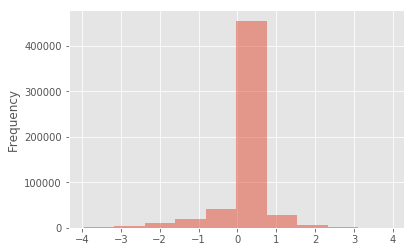

In [14]:
fig = plt.figure()

tmp_data['normalized_score'].plot.hist(alpha=0.5)
plt.show()

from the above histogram, we can see that roughly 450000 (out of 568454 data points) are around 0.  It doesn't seem there is enough variance in this column to add any value.  We will ignore this column when creating the model in the next notebook

## Inferential statistics

Let's check if there any correlation between the helpfulness numerator and denominator to the actual score. What we will do is the following:

1. find the pearson correlation coefficient between helpfulness numerator and denominator to the Score.
2. Use hypothesis testing to test if this correlation value is significant.  
3. The null hypothesis will be that there is no significant correlation between the variables.
4. We will use a permutation test to permute the helpfulness numerator/denominator values, and rerun the test.
5. Check the p-value of the observed correlation to the permutation samples, and check the significance.

From the results, we see that the observed correlation is outside of the range of the tested correlation values, with a confidence interval of 99%.  Hence we can conclude that there is some significance between the helpfuless numerator and denominator to the score.


In [22]:
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

In [31]:
columns = ['HelpfulnessNumerator','HelpfulnessDenominator']
dep_data = tmp_data[columns]
target_data = tmp_data['Score']

observed_correlations = {}
                     

for column in columns:
    x = dep_data[column].values
    y = target_data.values
    observed_correlations[column] = pearson_r(x,y)
for k,v in observed_correlations.iteritems():
    print k, 'has a pearson correlation of', v, 'to the feature Score'

HelpfulnessNumerator has a pearson correlation of -0.0325901134286 to the feature Score
HelpfulnessDenominator has a pearson correlation of -0.0979859576873 to the feature Score


In [36]:
#now we have the observed correlation, we will run permutation tests and resample
num_trials = 5000
trial_correlations = {}


for column in columns:
    corr_list = np.empty(num_trials)
    for i in range(num_trials):
        y = target_data.values
        x = np.random.permutation(dep_data[column].values)
        corr_list[i] = pearson_r(x,y)
    trial_correlations[column] = corr_list
        

In [42]:
conf_interval = 99
for k,v in trial_correlations.iteritems():
    print k, 'has range', np.percentile(v, [(100-conf_interval)/2, conf_interval + (100-conf_interval)/2]),\
    'with confidence interval', conf_interval


HelpfulnessNumerator has range [-0.00517265  0.0029612 ] with confidence interval 99
HelpfulnessDenominator has range [-0.00476361  0.00298221] with confidence interval 99


## save the data out into a csv for use in modeling.py


In [15]:
#create the positive review column, then save out
tmp_data['positive_review'] = tmp_data['Score'] > 3
tmp_data.to_csv(output_location)